<a href="https://colab.research.google.com/github/faruk17035/MachineLearning-Using-GoogleColab/blob/main/Enzyme_A%2BX_IG_lr_0_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Enzyme A+X.xlsx' 
df = pd.read_excel(file_name, index_col=0)
print(df.head()) # print the first 5 rows

            PubchemFP2  PubchemFP3  PubchemFP4  ...  BiGram399  BiGram400  Target
PubchemFP1                                      ...                              
1                    1           0           0  ...     3.0730    0.75382       1
1                    1           0           0  ...     2.1047    0.93939       1
1                    1           1           0  ...     2.1047    0.93939       1
1                    1           1           0  ...     2.8391    1.49230       1
1                    1           0           0  ...     1.8568    1.73260       1

[5 rows x 1281 columns]


In [38]:
df.shape

(8157, 1281)

In [39]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Target"]]
# Store the variable we are predicting 
target = "Target"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(8157, 1280)
(8157,)


Text(0, 0.5, 'Frequency')

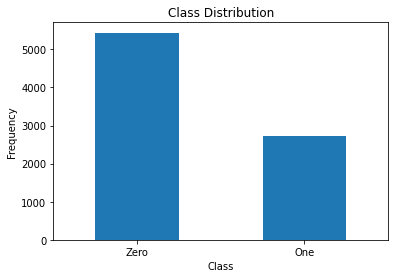

In [40]:
count_classes = pd.value_counts(df['Target'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")

LABELS = ["Zero", "One"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [41]:
One = df[df['Target']==1]

Zero = df[df['Target']==0]

In [42]:
print(Zero.shape,One.shape)

(5438, 1281) (2719, 1281)


In [43]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state = 20)
X_res,y_res=sm.fit_sample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
print(X_res.shape)
print(y_res.shape)

(10682, 1280)
(10682,)


In [45]:
#Split data into independent (X) and dependent(Y) columns

y = y_res
X = X_res

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=20)

In [47]:
## Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [48]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.01055161, 0.05640468, 0.02956142, ..., 0.15447341, 0.15486298,
       0.15459993])

In [49]:
mutual_info = pd.Series(mutual_info)
mutual_info.sort_values(ascending=False)

1196    0.168618
985     0.167335
1273    0.165779
1044    0.164672
1011    0.164654
          ...   
269     0.000000
270     0.000000
271     0.000000
272     0.000000
726     0.000000
Length: 1280, dtype: float64

In [50]:
mutual_info = pd.Series(mutual_info)
mutual_info.sort_values(ascending=False)

1196    0.168618
985     0.167335
1273    0.165779
1044    0.164672
1011    0.164654
          ...   
269     0.000000
270     0.000000
271     0.000000
272     0.000000
726     0.000000
Length: 1280, dtype: float64

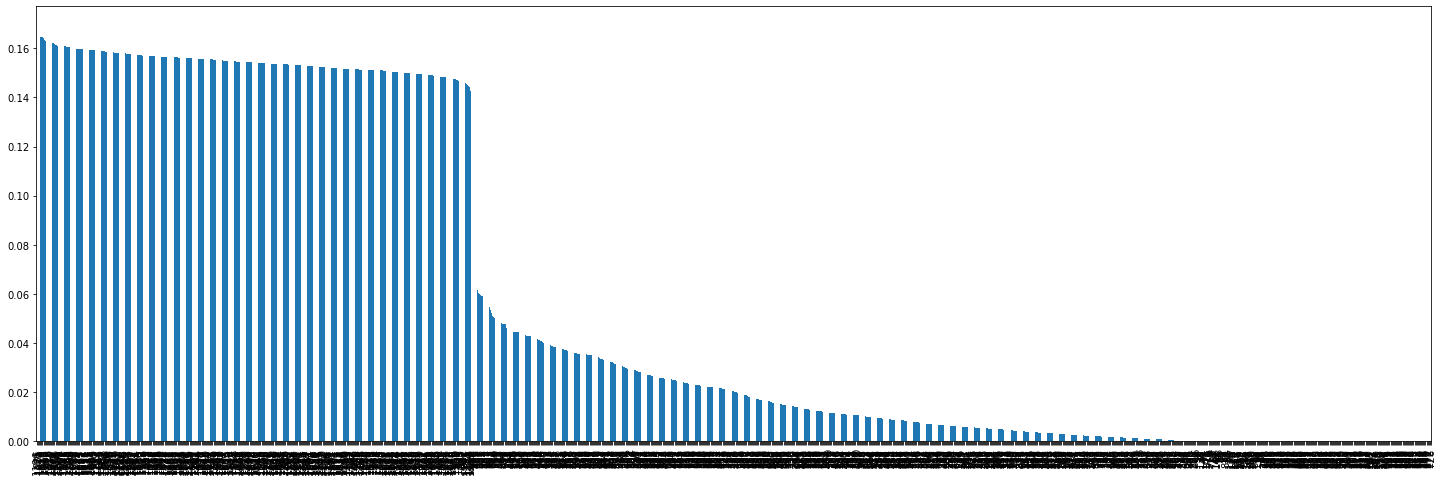

In [51]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(25, 8))

In [52]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 826 important features
#sel_five_cols = SelectKBest(mutual_info_classif, k=800)
bestfeatures_1 = SelectKBest(mutual_info_classif, k=1000) ## we will select 826 features
select = bestfeatures_1.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (9613, 1280)
X_train_selected.shape: (9613, 1000)


In [53]:
select = bestfeatures_1.fit(X_test,y_test)
X_test_selected = select.transform(X_test)

print("X_train.shape: {}".format(X_test.shape))
print("X_train_selected.shape: {}".format(X_test_selected.shape))

X_train.shape: (1069, 1280)
X_train_selected.shape: (1069, 1000)


In [54]:
print(X_train_selected.shape)
print(X_test_selected.shape)

(9613, 1000)
(1069, 1000)


In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_selected)
X_test = scaler.transform(X_test_selected)


In [57]:
X_train = X_train.reshape(9613, 1000,1)
X_test = X_test.reshape(1069, 1000, 1)

In [58]:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (1000,1)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

  return model

model = KerasClassifier(build_fn = built_classifier,batch_size=16,epochs=100)
accuracies = cross_val_score(estimator=model,X=X_train,y=y_train,cv=5,n_jobs=-1)
print(accuracies)

[0.9381175  0.93759751 0.94539779 0.93392301 0.94120705]


In [59]:
mean = accuracies.mean()
print(mean)


0.9392485737800598


In [60]:
### Now making Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = cross_val_predict(model,X_train, y_train, cv=5,n_jobs=-1)
cmann=confusion_matrix(y_train, y_pred)
print(cmann)
accuracy = (cmann[0][0]+cmann[1][1])/(cmann[0][1] + cmann[1][0] +cmann[0][0] +cmann[1][1]) 
print(accuracy*100)

[[4425  466]
 [  66 4656]]
94.46582752522626


In [61]:
from sklearn.metrics import roc_auc_score
print("AUC = ",roc_auc_score(y_train,y_pred))

AUC =  0.9453729161021579


In [62]:
from sklearn.metrics import matthews_corrcoef,confusion_matrix
matthews_corrcoef(y_train,y_pred)

0.892533050794143

In [63]:
TP = cmann[0][0]
TN = cmann[1][1]
FP = cmann[0][1]
FN = cmann[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 4425
True Negatives: 4656
False Positives: 466
False Negatives: 66


In [64]:
sensitivity=(TP/(TP+FN))
sensitivity

0.9853039412157648

In [65]:
specificity = (TN/(TN+FP))
specificity

0.9090199140960562

In [66]:
precision = (TP/(TP+FP))
recall = (TP/(TP+FN))
print(precision)
print(recall)

0.904722960539767
0.9853039412157648


In [67]:
f1 = (2*(precision*recall))/(precision+recall)
f1

0.9432956725644851

In [68]:
## AUPR score
from sklearn.metrics import average_precision_score
aupr=average_precision_score(y_train,y_pred)
aupr

0.9031801287915231